In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import anderson

In [5]:
df=sns.load_dataset("penguins")
df.columns = ["Species", "Island", "Bill_Length(mm)", "Bill_Depth(mm)", "Flipper_Length(mm)", "Body_Mass(g)", "Sex"]


In [20]:
# handling missing value 
# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')
# Use the imputer to fill missing values in the DataFrame 'df'
df.iloc[:,:] = imputer.fit_transform(df)

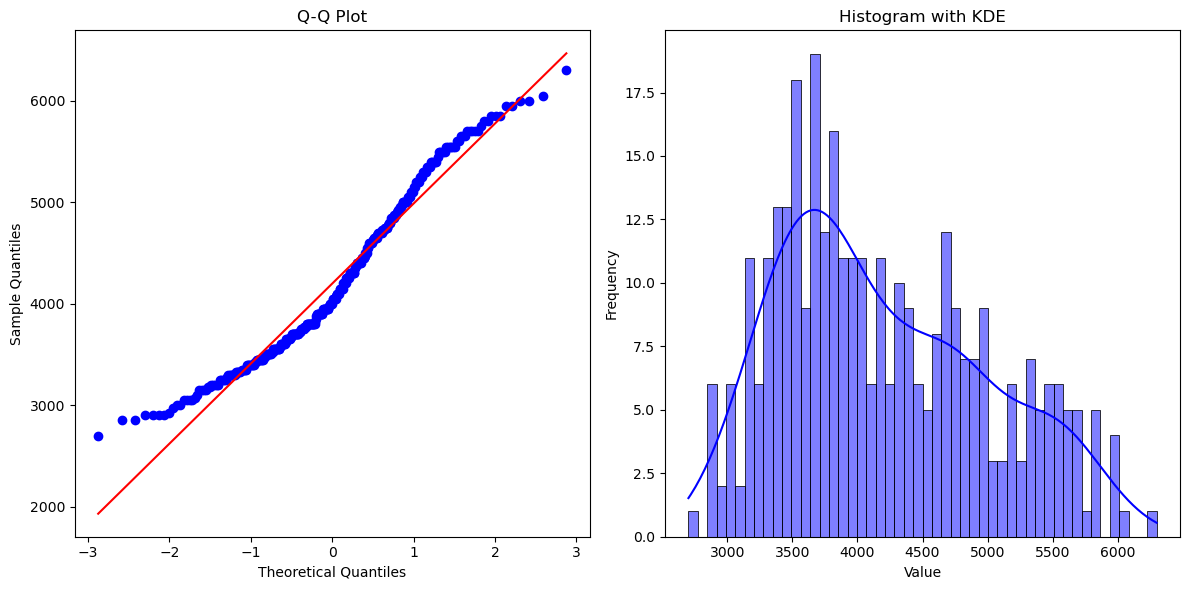

The p_value is 2.96934192789422e-08
The data does not appear to be normally distributed


In [58]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Check distribution for "Body_Mass(g)"
# define the variable as a selection of the dataframe
Body_Mass = df["Body_Mass(g)"]

# Create a Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(Body_Mass, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Create a histogram with a KDE line
plt.subplot(1, 2, 2)
sns.histplot(Body_Mass, bins=50, kde=True, color='blue', edgecolor='k')
plt.title("Histogram with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
statistic, p_value = stats.shapiro(Body_Mass)
alpha = 0.05
print(f'The p_value is {p_value}')
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed")

In [27]:
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(df["Body_Mass(g)"])

# Print summary of evaluated distributions
print(dist.summary)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 1.23806e-07] [loc=4199.419 scale=799.034]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 4.13477e-07] [loc=2700.000 scale=1499.419]
[distfit] >INFO> [pareto    ] [0.0 sec] [RSS: 4.13477e-07] [loc=-274877904244.000 scale=274877906944.000]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 1.0497e-07] [loc=4224.032 scale=750.141]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 1.23804e-07] [loc=4199.412 scale=799.033]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 9.68844e-07] [loc=2700.418 scale=2.427]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 4.35329e-08] [loc=2489.091 scale=398.306]
[distfit] >INFO> [lognorm   ] [0.20 sec] [RSS: 9.52663e-07] [loc=2700.000 scale=3.556]
[distfit] >INFO> [beta      ] [0.10 sec] [RSS: 5.19011e-08] [loc=2676.012 scale=4000.641]
[distfit] >INFO> [uniform   ] [0.01 sec] [RSS: 2.71422e-07] [loc=2700.000 scale=3600.000]
[distfit] >INFO> [loggamma  ] [0.10 sec] [RSS: 1

          name     score             loc                scale  \
0        gamma       0.0     2489.090709           398.305503   
1         beta       0.0     2676.012201          4000.641358   
2     dweibull       0.0     4224.032489           750.140657   
3     loggamma       0.0  -188016.047669         27351.953419   
4            t       0.0     4199.411626           799.032883   
5         norm       0.0     4199.418605           799.033998   
6      uniform       0.0          2700.0               3600.0   
7       pareto       0.0 -274877904244.0  274877906943.999969   
8        expon       0.0          2700.0          1499.418605   
9      lognorm  0.000001          2700.0             3.555533   
10  genextreme  0.000001     2700.418262              2.42732   

                                       arg  \
0                     (4.294010162381717,)   
1   (1.98351718476786, 3.1956097470019835)   
2                    (1.5620437631090294,)   
3                    (1127.66681602

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=4.29401, loc=2489.09, scale=398.306)'}, xlabel='Values', ylabel='Frequency'>)

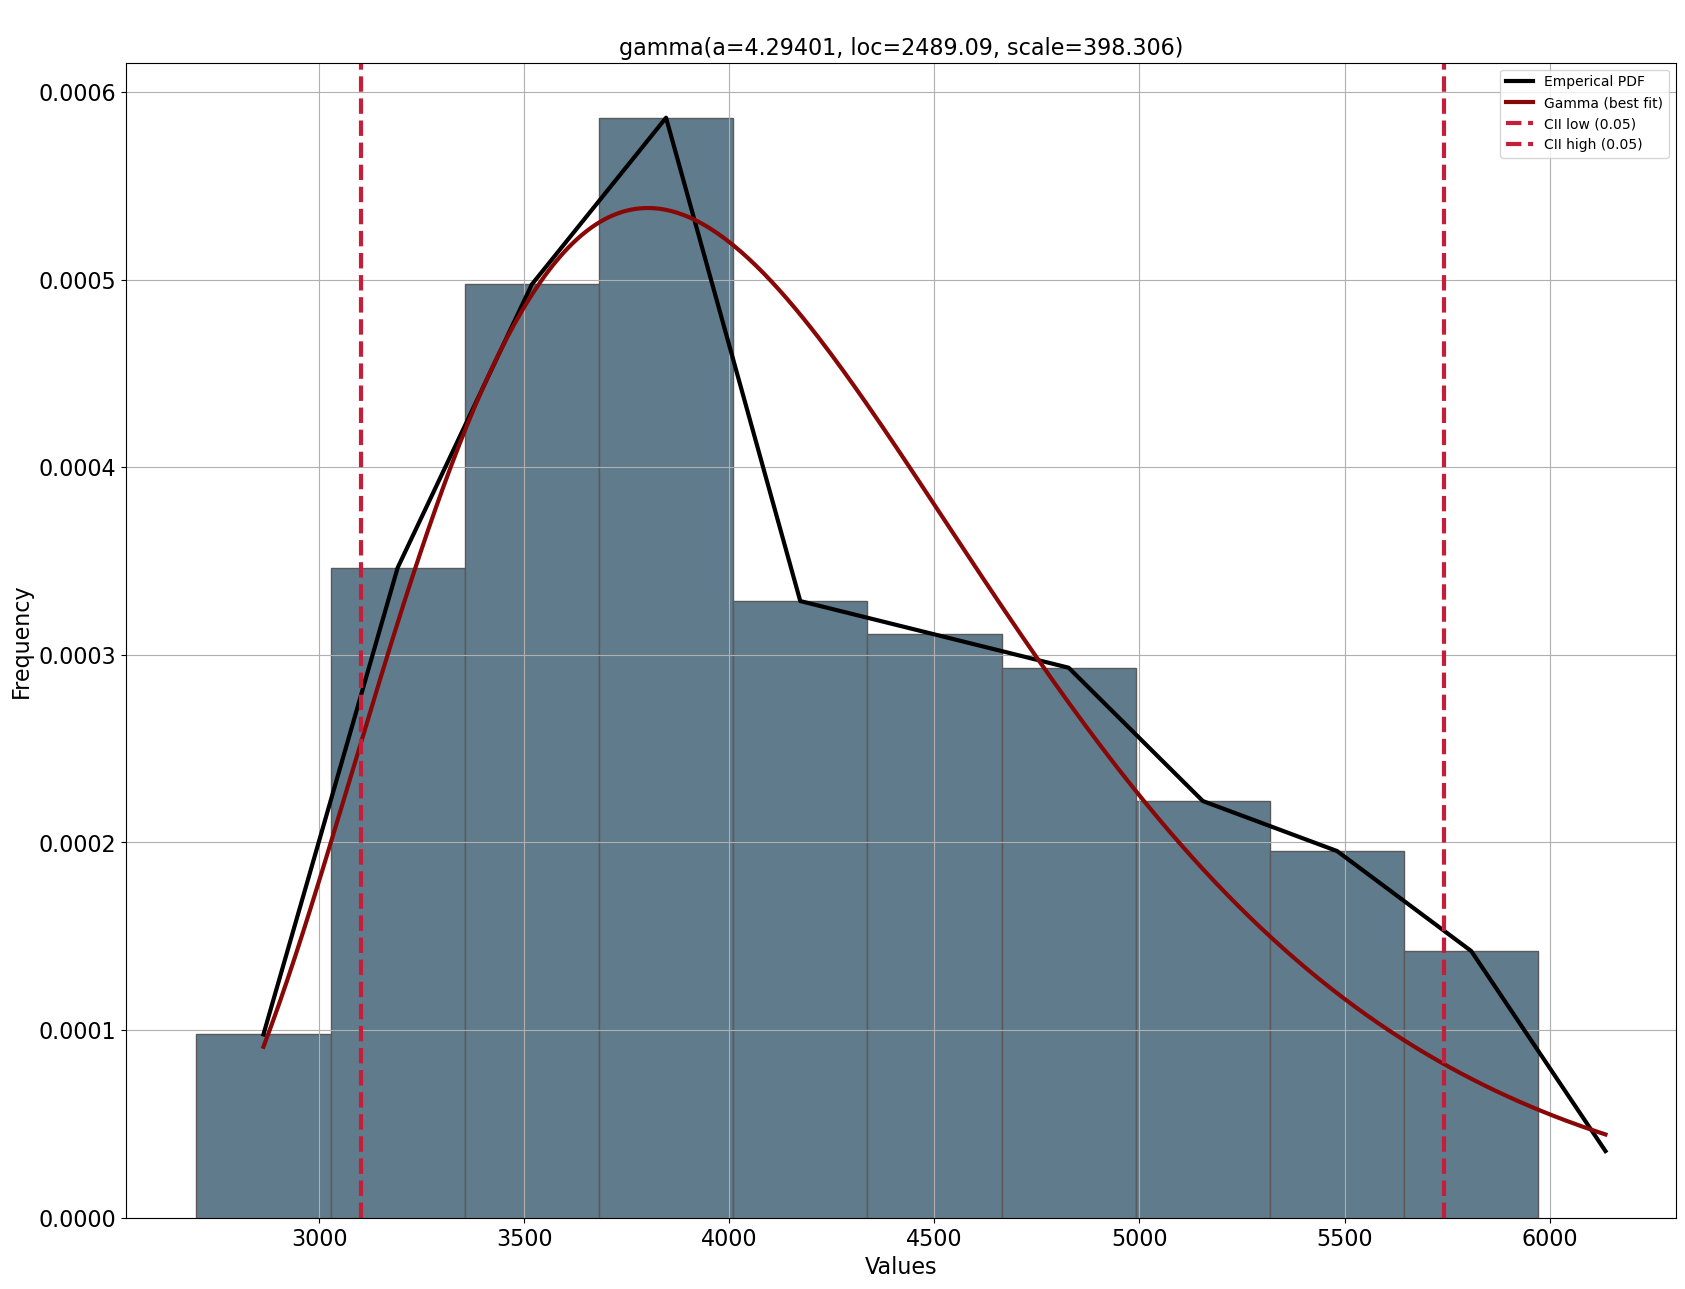

In [31]:
# Plot results
dist.plot()

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Gamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

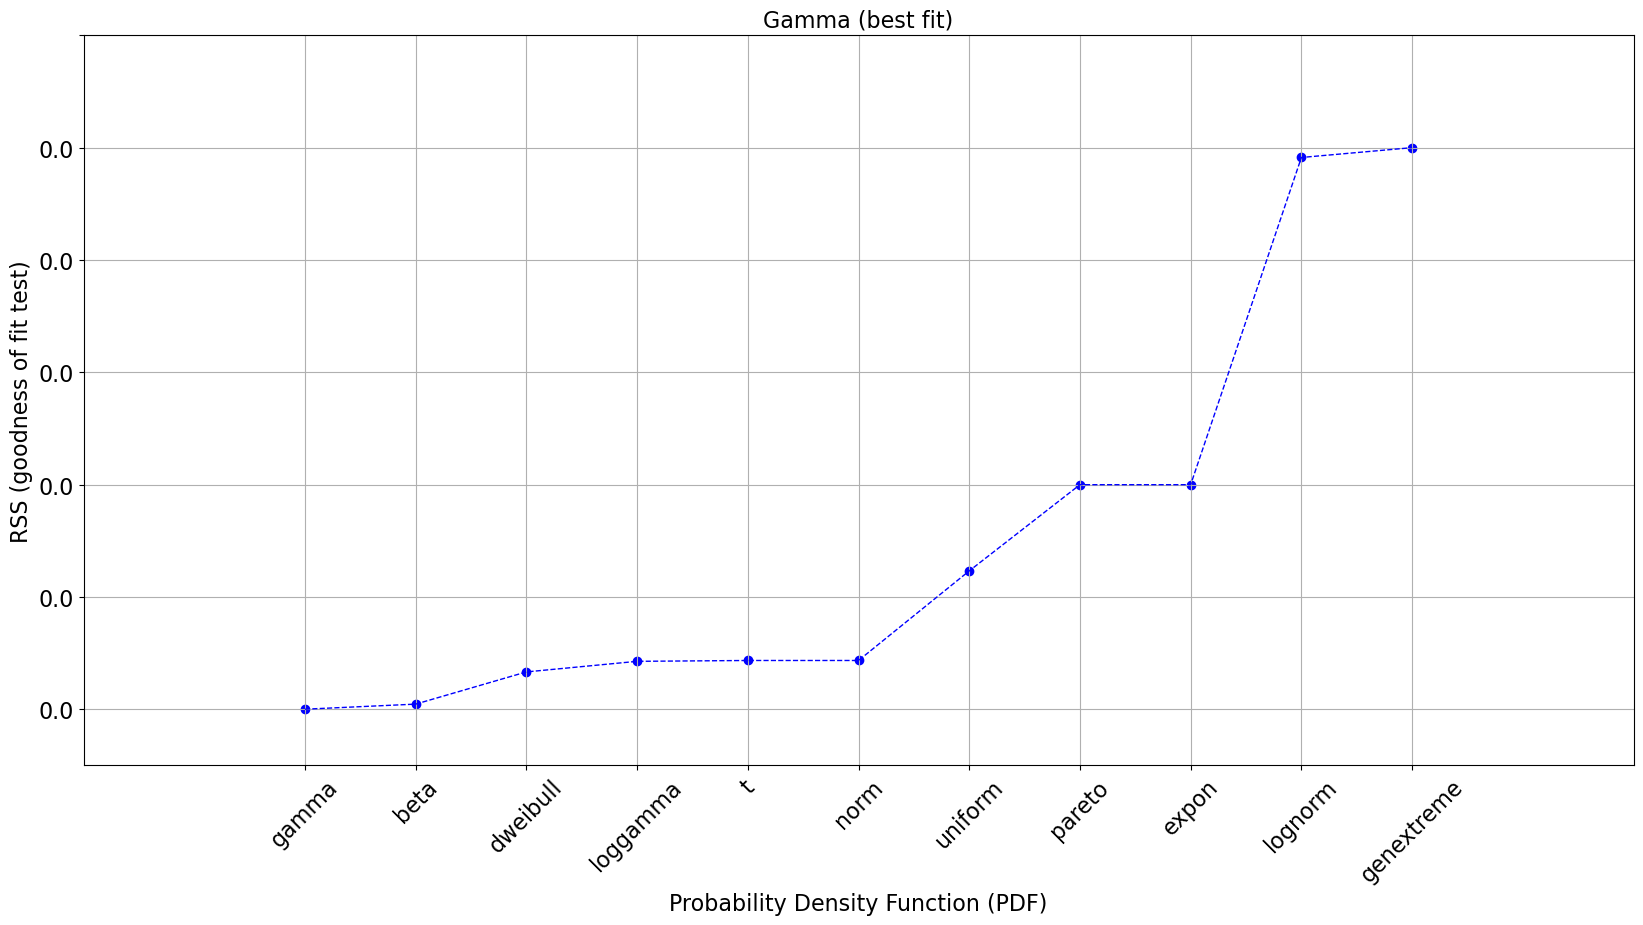

In [33]:
dist.plot_summary()

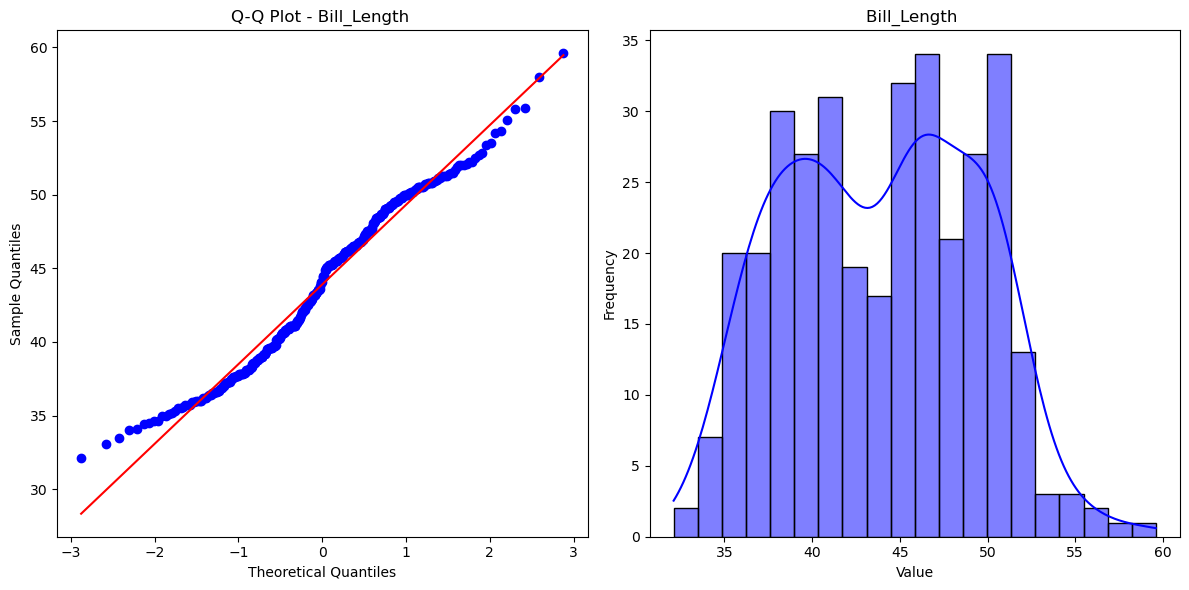

The p_value is 1.2613987564691342e-05
The data does not appear to be normally distributed


In [64]:
# Check distribution for "Body_Mass(g)"
# define the variable as a selection of the dataframe
Bill_Length = df["Bill_Length(mm)"]

# Create a Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(Bill_Length, dist="norm", plot=plt)
plt.title("Q-Q Plot - Bill_Length ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Create a histogram with a KDE line
plt.subplot(1, 2, 2)
sns.histplot(Bill_Length, bins=20, kde=True, color='blue', edgecolor='k')
plt.title("Bill_Length ")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
statistic, p_value = stats.shapiro(Bill_Length)
alpha = 0.05
print(f'The p_value is {p_value}')
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed")

In [61]:
# Determine best-fitting probability distribution for data
dist.fit_transform(Bill_Length)

# Print summary of evaluated distributions
print(dist.summary)

          name     score           loc         scale  \
0     dweibull  0.001257     43.892847      5.246841   
1         beta  0.001525     31.426835     29.760183   
2   genextreme  0.002033     41.902365       5.30191   
3     loggamma  0.002142   -958.494997     151.03687   
4            t  0.002182       43.9055      5.440128   
5         norm  0.002182     43.905523      5.439958   
6        gamma  0.002211   -106.288021      0.196661   
7      lognorm  0.002231    -75.301566    119.082988   
8      uniform  0.006415          32.1          27.5   
9        expon  0.010044          32.1     11.805523   
10      pareto  0.010044 -4294967263.9  4294967296.0   

                                         arg  \
0                      (1.7152828618146692,)   
1   (2.6512074150377267, 3.6872811495652393)   
2                     (0.25441450207297633,)   
3                       (763.1007508703606,)   
4                         (9903374.2804369,)   
5                                      

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=1.71528, loc=43.8928, scale=5.24684)'}, xlabel='Values', ylabel='Frequency'>)

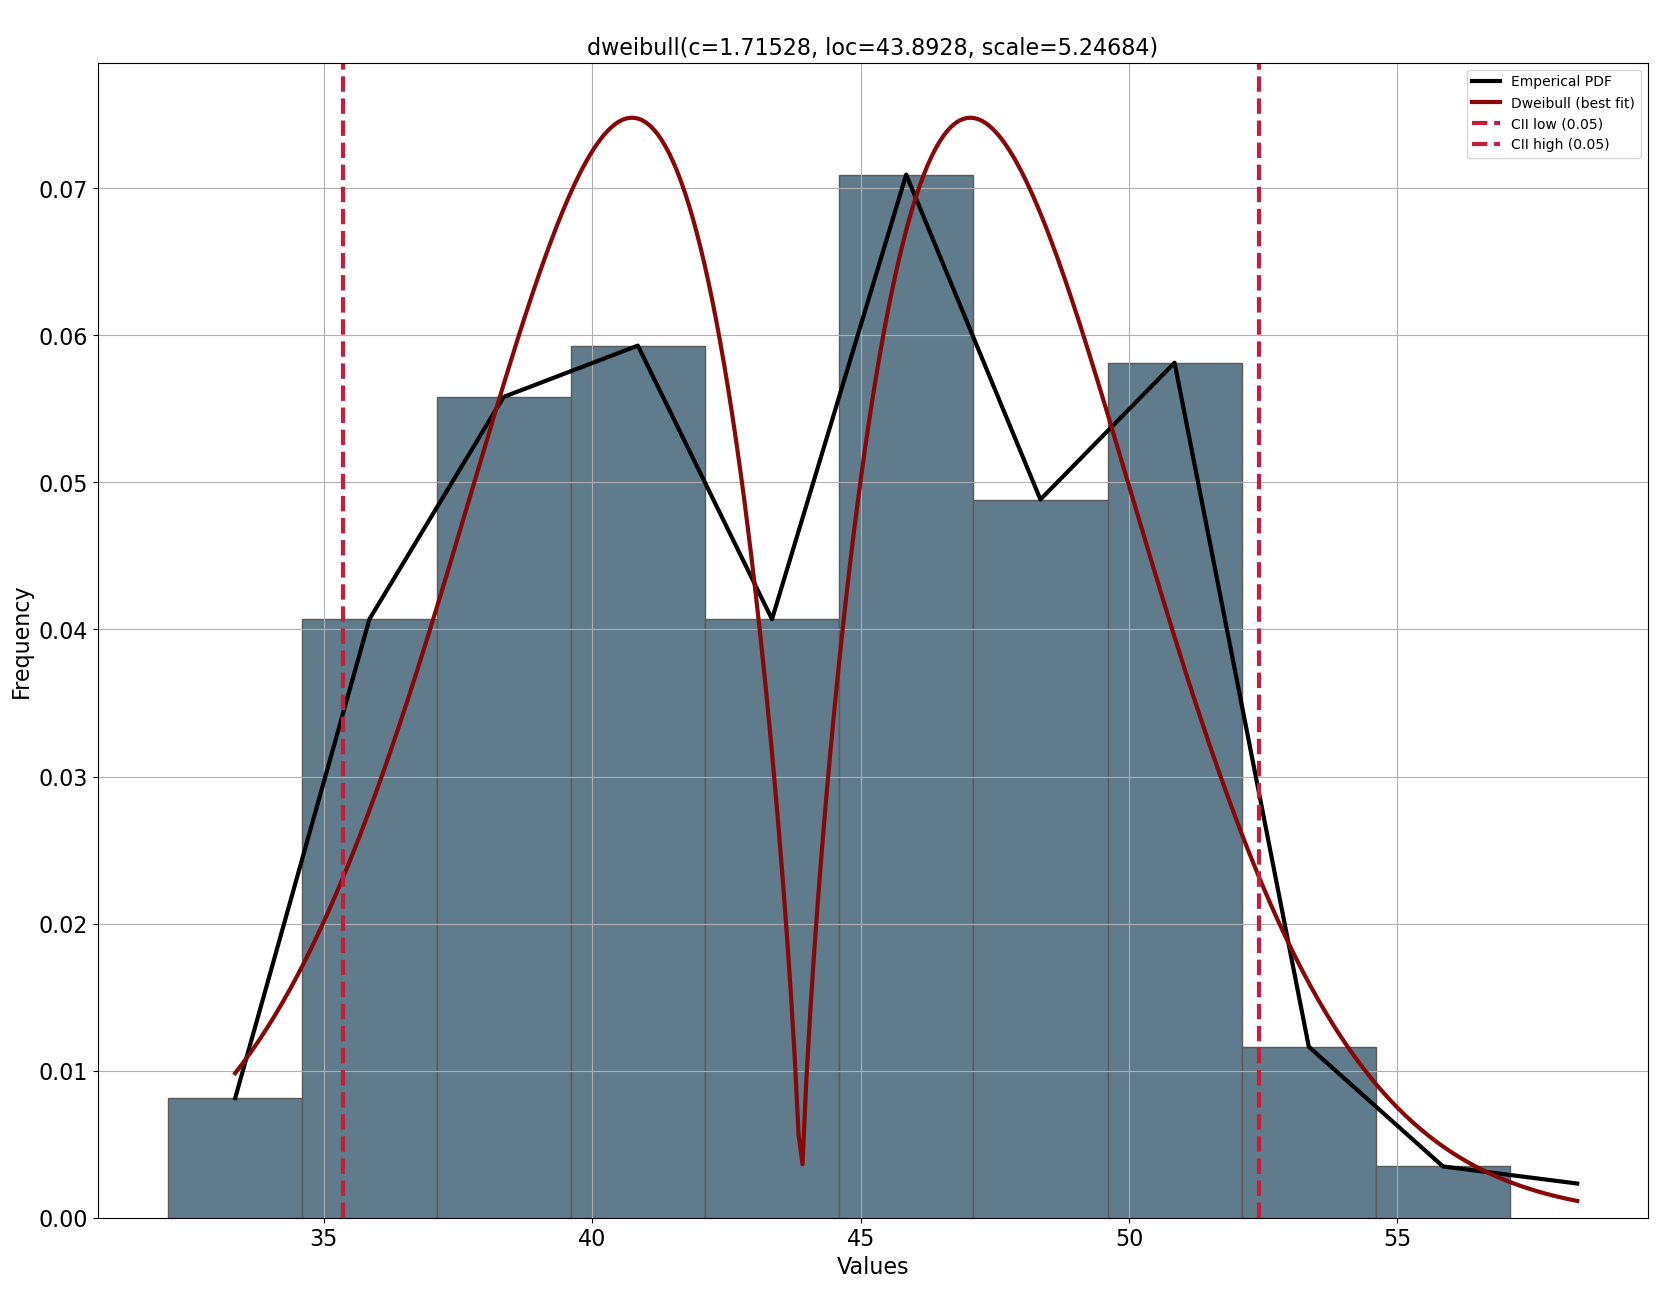

In [62]:
# Plot results
dist.plot()

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

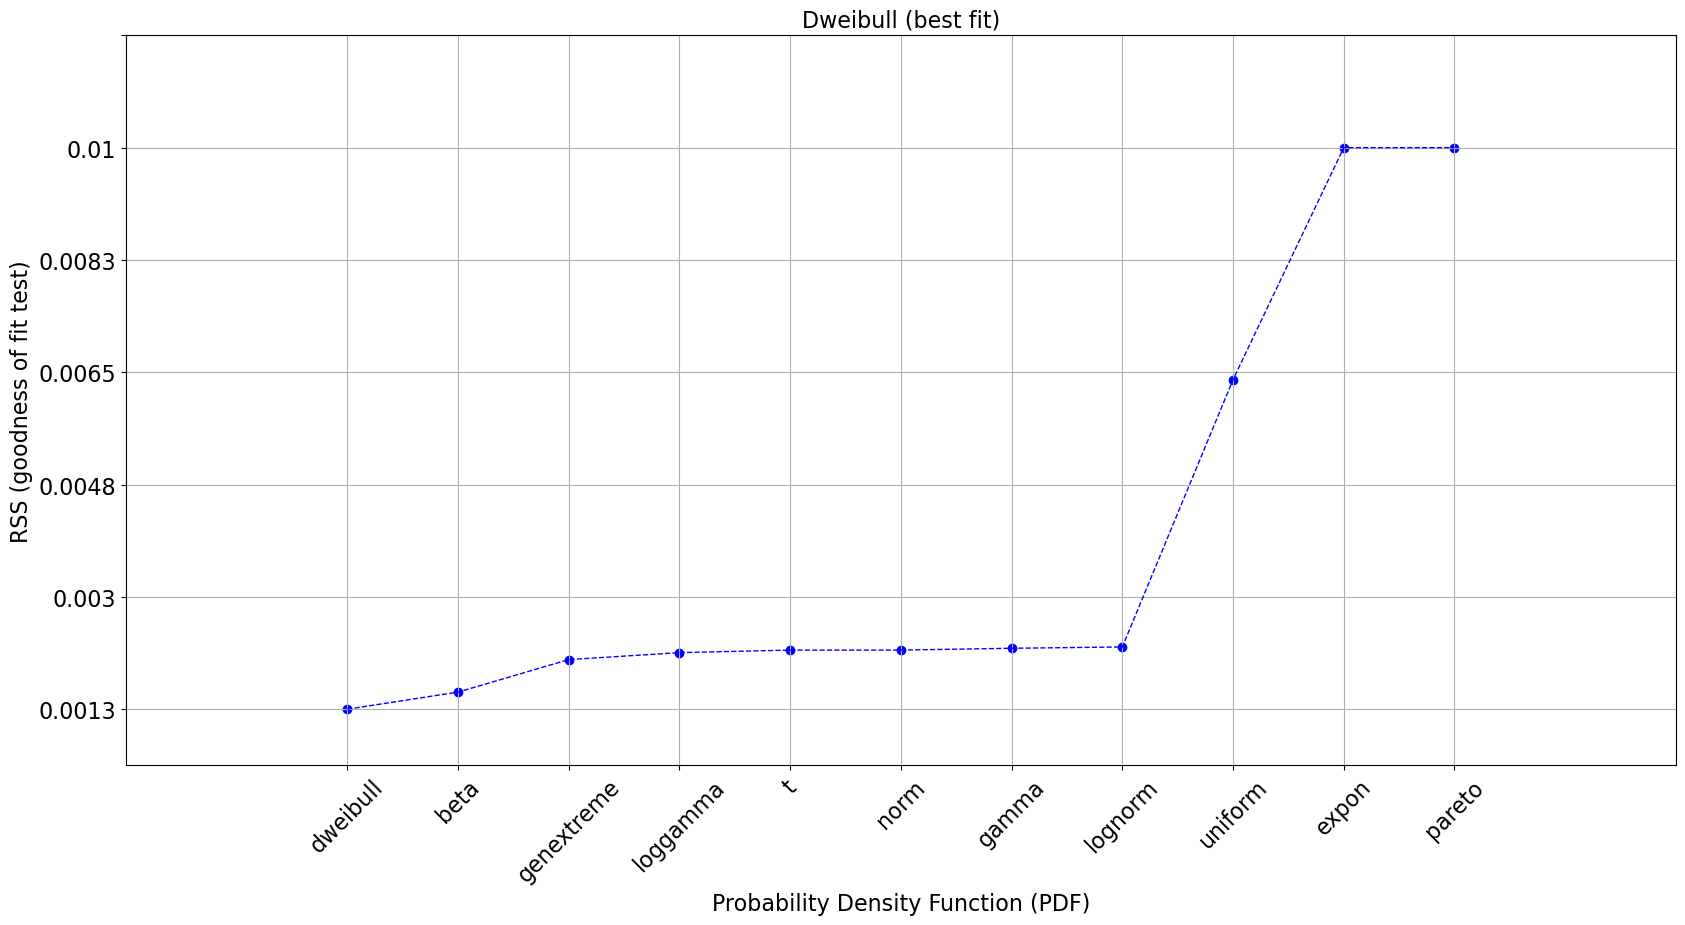

In [63]:
dist.plot_summary()

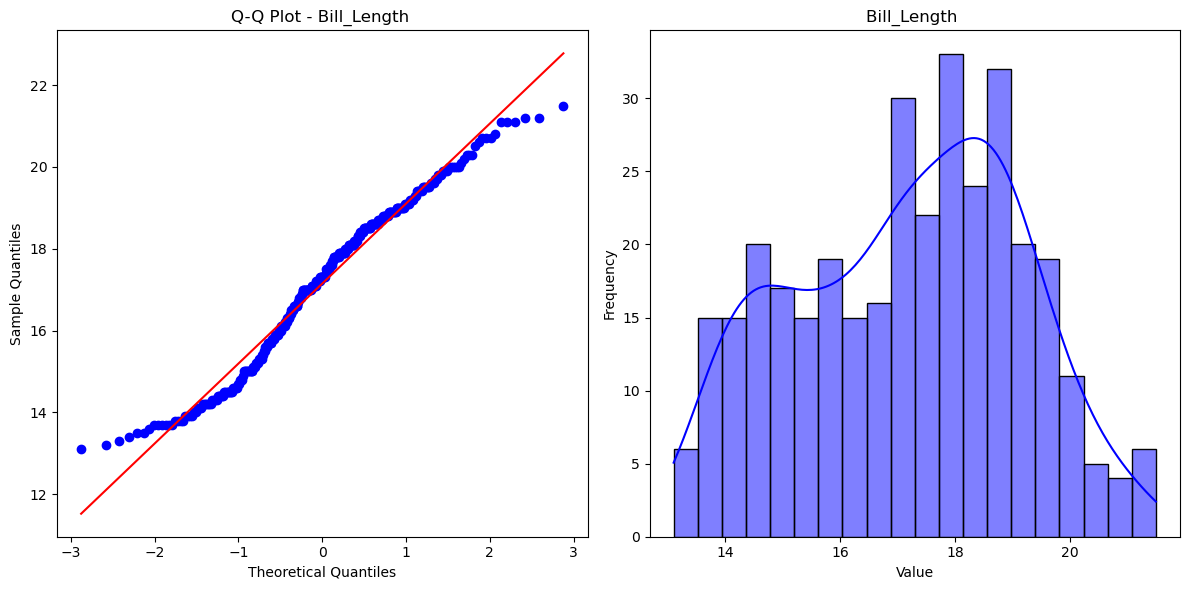

The p_value is 5.484943812916754e-06
The data does not appear to be normally distributed


In [66]:
# Check distribution for "Body_Mass(g)"
# define the variable as a selection of the dataframe
Bill_Depth = df["Bill_Depth(mm)"]

# Create a Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(Bill_Depth, dist="norm", plot=plt)
plt.title("Q-Q Plot - Bill_Length ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Create a histogram with a KDE line
plt.subplot(1, 2, 2)
sns.histplot(Bill_Depth, bins=20, kde=True, color='blue', edgecolor='k')
plt.title("Bill_Length ")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
statistic, p_value = stats.shapiro(Bill_Depth)
alpha = 0.05
print(f'The p_value is {p_value}')
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed")

In [69]:
# Determine best-fitting probability distribution for data
dist.fit_transform(Bill_Depth)

# Print summary of evaluated distributions
print(dist.summary)

          name     score          loc        scale  \
0         beta  0.007403     12.98565     8.617402   
1   genextreme   0.00747    16.533283     2.026125   
2     loggamma  0.008655    -3.158169     7.556722   
3         norm  0.010789    17.150291     1.966197   
4            t   0.01079    17.150298     1.966148   
5     dweibull   0.01087    17.246544     1.801074   
6      lognorm  0.011057  -211.232758   228.378955   
7        gamma  0.011604   -26.565578     0.089565   
8      uniform  0.025946         13.1          8.4   
9        expon   0.06748         13.1     4.050291   
10      pareto   0.06748 -268435442.9  268435456.0   

                                         arg  \
0   (1.8045832549202117, 1.9594823230217973)   
1                      (0.3663035201142979,)   
2                        (15.1916075975237,)   
3                                         ()   
4                       (7422717.956153594,)   
5                      (1.4276242762769116,)   
6              

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=1.80458, b=1.95948, loc=12.9856, scale=8.6174)'}, xlabel='Values', ylabel='Frequency'>)

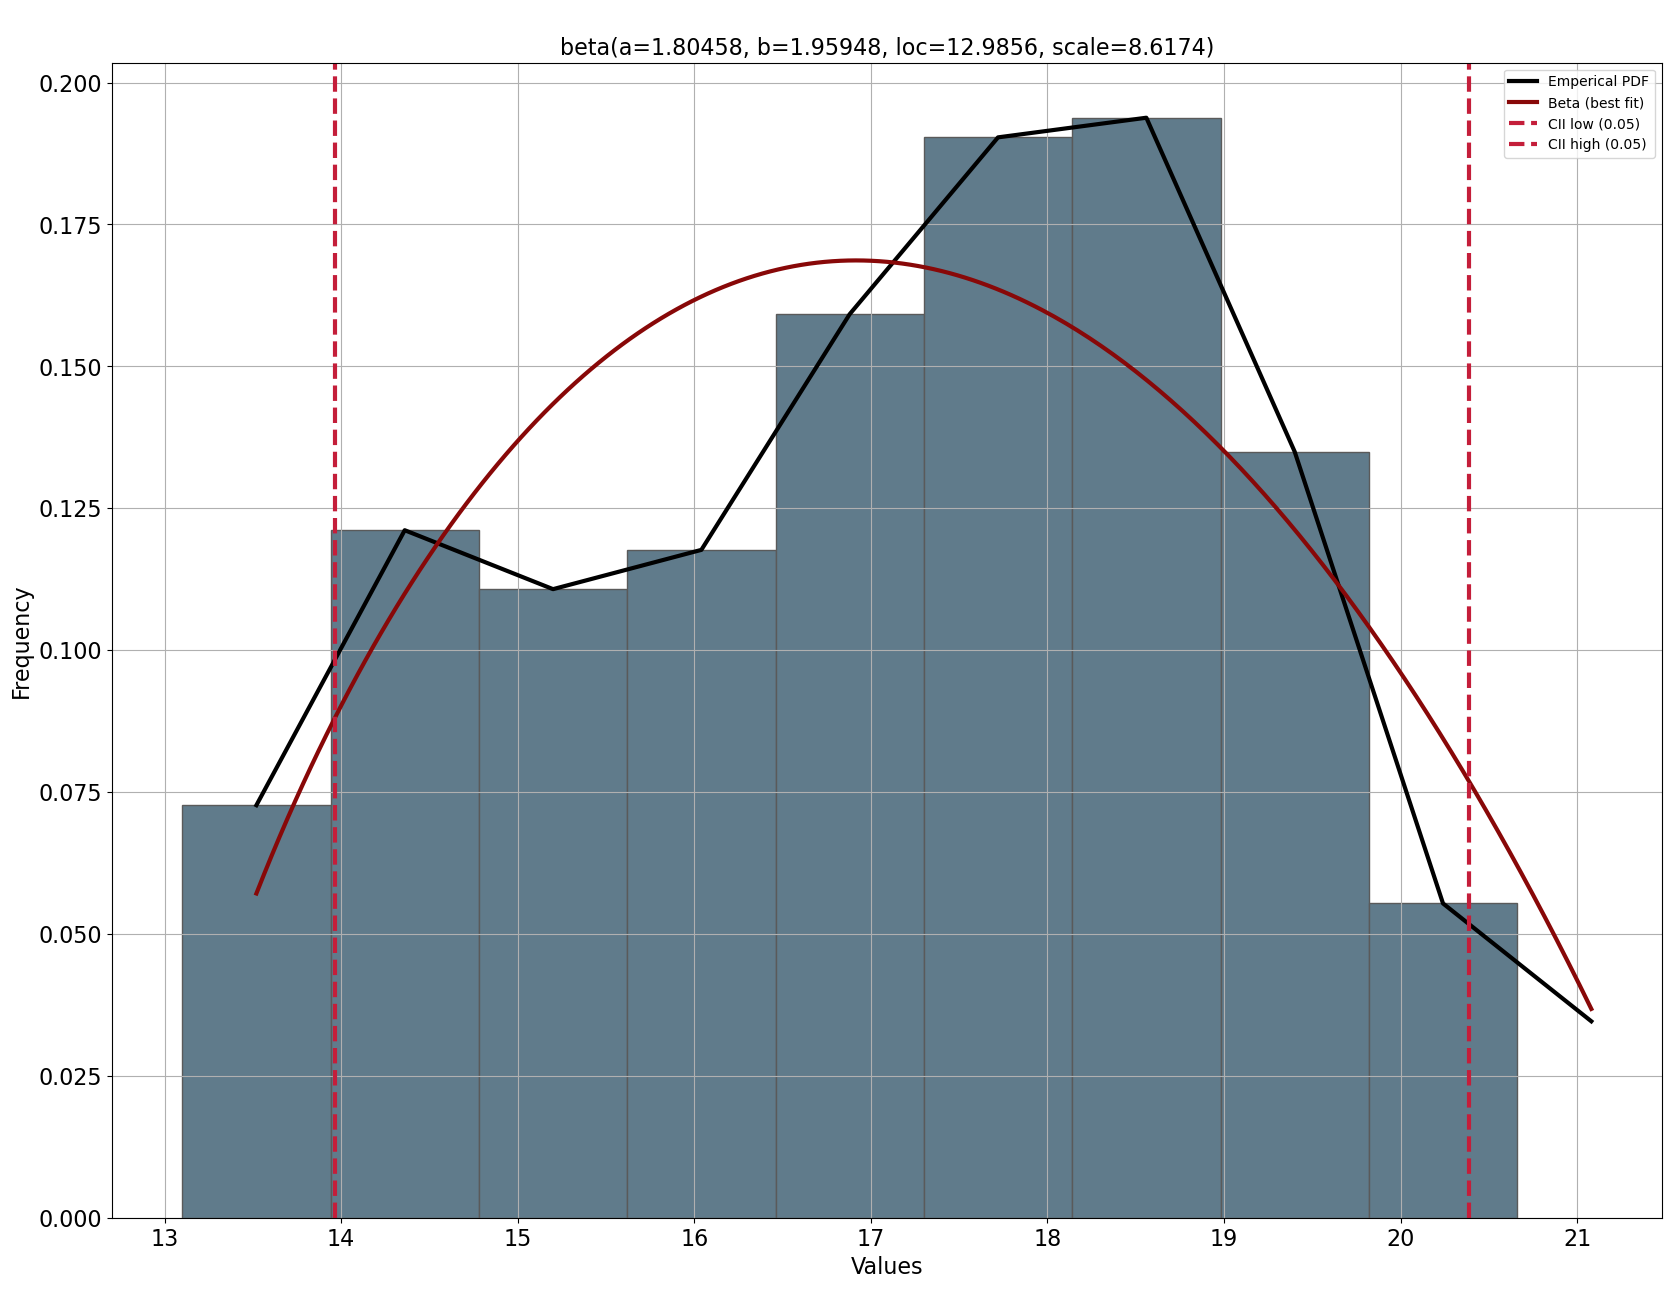

In [80]:
dist.plot()

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

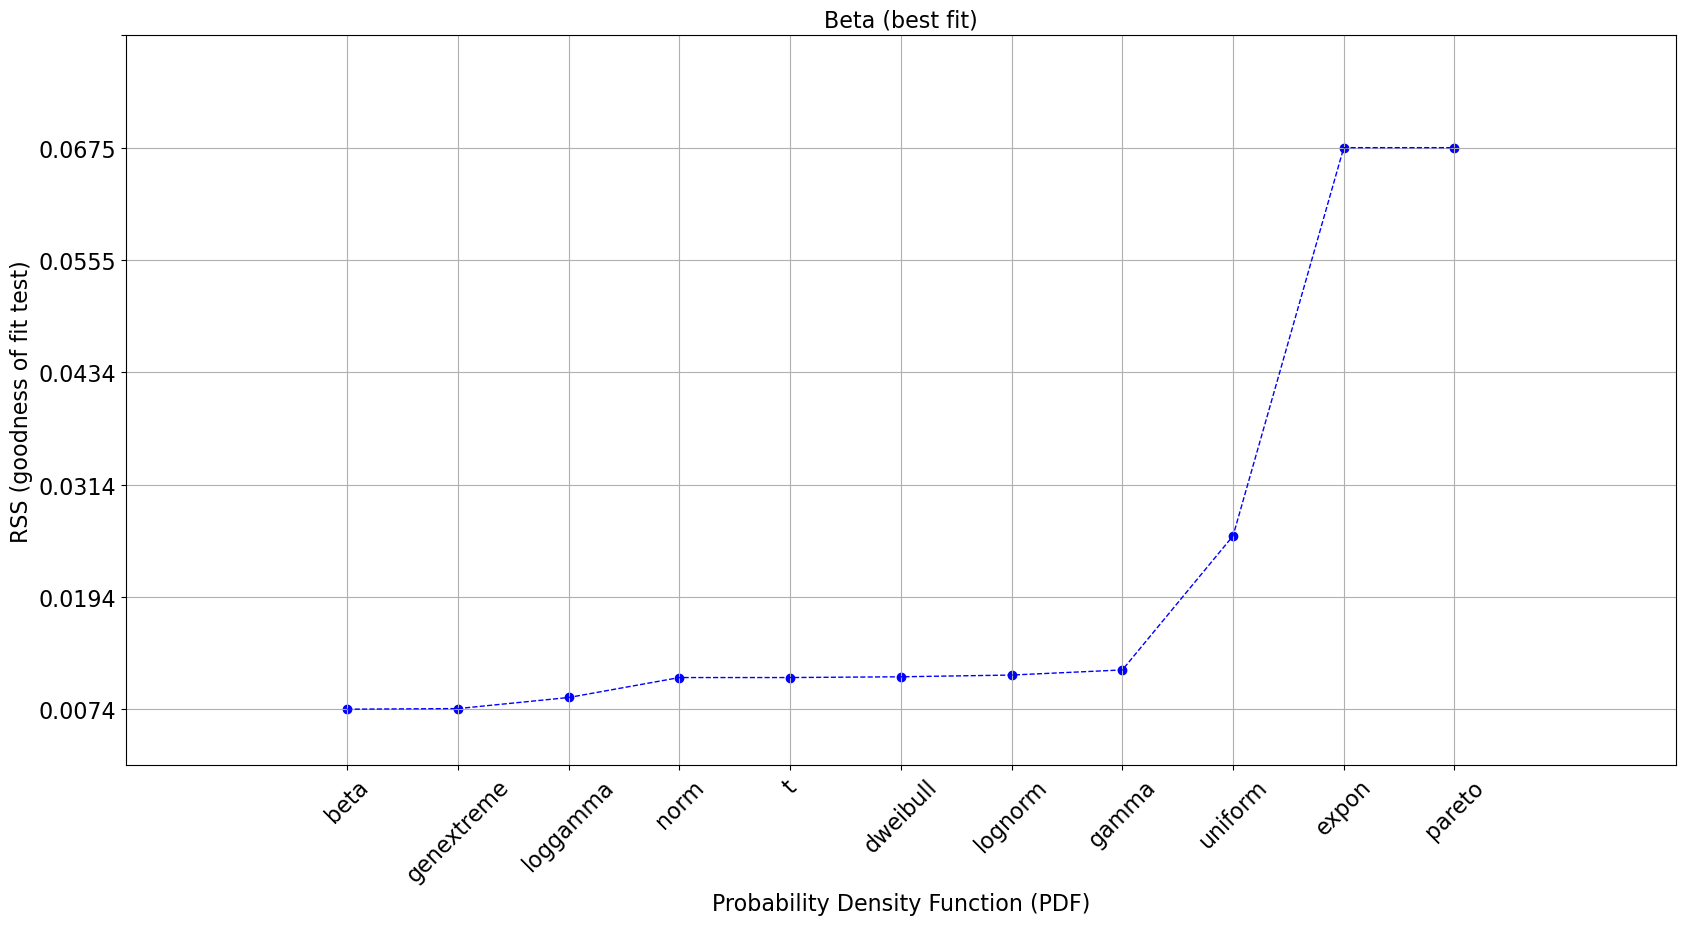

In [76]:
dist.plot_summary()